In [18]:
import json
import os
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
#import squarify
from functools import reduce
path = """C:\\Users\\Koushik\\Downloads\\open-data-master\\open-data-master\\data\\my_events\\"""
Xg_req = pd.DataFrame(data=None)
for filename in (os.listdir(path)):
    #print(filename)
    
    with open("%s" % path + filename,encoding="utf8") as data_file:    
        data = json.load(data_file)
        df = pd.DataFrame(data=None)
        
        df = json_normalize(data, sep = "_")
        
        #df =  df[(df['type_name'] == "Shot")]
        #df = df.loc[:,['location','shot_body_part_id','shot_end_location','shot_one_on_one','shot_technique_id','shot_type_id','under_pressure','shot_outcome_id']]
        #print(df.shape)
    Xg_req = Xg_req.append(df,ignore_index=True,sort=False)
        #df.drop(df.index, inplace=True)
        
print("done")
df = Xg_req

done


In [32]:
d = df.query('shot_outcome_id == 97')
d

,bad_behaviour_card_id,bad_behaviour_card_name,ball_receipt_outcome_id,ball_receipt_outcome_name,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,dribble_nutmeg,dribble_outcome_id,dribble_outcome_name,...,pass_miscommunication,shot_aerial_won,shot_open_goal,50_50_outcome_id,50_50_outcome_name,block_offensive,miscontrol_aerial_won,foul_committed_penalty,shot_deflected,shot_redirect
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ozil_pass  = df[(df.type_name == 'Pass') & (df.team_name == 'Germany') & (df.player_name == 'Mesut Ã–zil') ]
pass_column = [i for i in df.columns if i.startswith("pass")]
ozil_pass = ozil_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
ozil_pass.head()

,id,period,timestamp,location,pass_end_location,pass_recipient_name
4,eea20658-0e9f-484a-90d3-dccdc589d81f,1,00:00:00.187,"[60.0, 40.0]","[49.0, 35.0]",Toni Kroos
10,ad723dee-c477-4604-970a-48f6f3e54e45,1,00:00:04.200,"[55.0, 43.0]","[37.0, 59.0]",Niklas SÃ¼le
112,89cd84d7-c140-4322-9d13-1cd4abd61829,1,00:02:53.600,"[65.0, 23.0]","[71.0, 27.0]",Marco Reus
129,f189456f-9790-468f-937c-251068dfb181,1,00:03:03.517,"[60.0, 25.0]","[56.0, 38.0]",Sami Khedira
143,408b675d-cbcb-4edd-baff-32bf2c93107d,1,00:03:15.080,"[67.0, 45.0]","[56.0, 32.0]",Toni Kroos


In [4]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

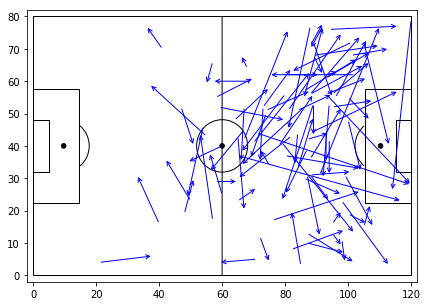

In [5]:
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
#plt.plot(x_axis,y_axis,'ro')
#plt.plot(x,y,'bo')
#plt.axis('off')

for i in range(len(ozil_pass)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (ozil_pass.iloc[i]['pass_end_location'][0], ozil_pass.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (ozil_pass.iloc[i]['location'][0], ozil_pass.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
plt.show()

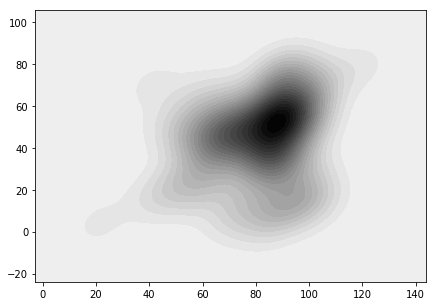

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

x_coord = [i[0] for i in ozil_pass["location"]]
y_coord = [i[1] for i in ozil_pass["location"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "black", n_levels = 30)
plt.show()